# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# leer conjuntos de datos en los DataFrames
instacart_order = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# mostrar información del DataFrame
print(instacart_order.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [4]:
# mostrar información del DataFrame
products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [6]:
# mostrar información del DataFrame
aisles.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
# mostrar información del DataFrame
departments.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

  **Tras realizar un análisis inicial de los conjuntos de datos, se han obtenido varias observaciones y conclusiones importantes que pueden guiar los siguientes pasos en el análisis de los datos de Instacart:**

**Tamaño de los DataFrames:

    *instacart_order: Contiene 478,967 registros y 6 columnas. Este dataframe es fundamental para entender la frecuencia y los patrones de compra de los usuarios.

    *products: Tiene 49,694 entradas y 4 columnas, lo que proporciona información clave sobre los productos disponibles en la tienda.

    *order_products: Es el dataframe más grande, con 4,545,007 registros y 4 columnas. Es crucial para analizar qué productos son comprados y en qué orden.

    *aisles: Contiene 134 entradas, mostrando la categorización de los productos en pasillos, lo cual es útil para la segmentación de productos.

    *departments: Tiene solo 21 entradas, proporcionando una vista general de los departamentos en la tienda.

**Valores Nulos:

    *En instacart_order, la columna days_since_prior_order tiene 28,819 valores nulos, lo que podría ser relevante para el análisis del comportamiento del cliente, ya que esta columna indica el tiempo desde el último pedido.

    *En products, product_name tiene 1,258 valores nulos. Es esencial manejar estos nulos, ya que podrían afectar los análisis relacionados con los productos.

    *En order_products, la columna add_to_cart_order presenta 83,836 valores nulos, lo que sugiere que hay productos que no tienen un orden de adición al carrito registrado. Esto podría afectar el análisis de la secuencia de compra.

**Tipos de Datos:

    *Las columnas de identificación, como order_id, user_id, product_id, y aisle_id, son de tipo entero, lo que es adecuado para su función.

    *Las columnas que representan cantidades, como add_to_cart_order y days_since_prior_order, son de tipo float64, lo que permite manejar valores decimales.

    *Los datos categóricos como product_name, aisle, y department son de tipo objeto, que es apropiado para texto. Es posible que se necesiten transformaciones o codificaciones adicionales para ciertos análisis.

**Memoria Utilizada:

    *Los dataframes tienen un uso de memoria que varía desde 464 bytes (departments) hasta 138.7 MB (order_products). Esto indica que, aunque algunos conjuntos de datos son pequeños, otros son significativamente más grandes y pueden requerir optimización para el análisis.

   *Esta descripción y análisis inicial del conjunto de datos sienta las bases para un análisis más profundo y detallado en las siguientes etapas del proyecto.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

***PLAN DE SOLUCIÓN***

**El preprocesamiento incluirá la conversión de tipos de datos, la identificación y manejo de valores ausentes y duplicados, y la limpieza de datos en general para preparar el conjunto de datos para su análisis.

In [8]:
# Convertir columnas de ID a enteros
instacart_order['order_id'] = instacart_order['order_id'].astype(int)
instacart_order['user_id'] = instacart_order['user_id'].astype(int)
products['product_id'] = products['product_id'].astype(int)
products['aisle_id'] = products['aisle_id'].astype(int)
products['department_id'] = products['department_id'].astype(int)
order_products['order_id'] = order_products['order_id'].astype(int)
order_products['product_id'] = order_products['product_id'].astype(int)

#Verifica la corrección 
print(instacart_order.dtypes)
print()
print(products.dtypes)
print()
print(order_products.dtypes)
print()
print(aisles.dtypes)
print()
print(departments.dtypes)
print()

order_id                    int64
user_id                     int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

order_id               int64
product_id             int64
add_to_cart_order    float64
reordered              int64
dtype: object

aisle_id     int64
aisle       object
dtype: object

department_id     int64
department       object
dtype: object



## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [9]:
# Revisa si hay pedidos duplicados
duplicated_orders = instacart_order[instacart_order.duplicated(keep=False)]
display(duplicated_orders)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
30371,1918001,188546,14,3,2,16.0
99462,794638,50898,24,3,2,2.0
119251,408114,68324,4,3,2,18.0
142258,2845099,31189,11,3,2,7.0
145574,794638,50898,24,3,2,2.0
164581,1112182,202304,84,3,2,6.0
200059,1782114,106752,1,3,2,NaN
204042,2125197,14050,48,3,2,3.0
215294,2160484,107525,16,3,2,30.0
223105,2160484,107525,16,3,2,30.0


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

***SI***

***Al revisar la información proporcionada, parece que las filas duplicadas tienen en común principalmente estos aspectos:***

Día y Hora del Pedido: Todos los pedidos duplicados se realizaron el miércoles (order_dow = 3) a las 2 a.m. (order_hour_of_day = 2).
Usuario y Número de Pedido: Algunos registros duplicados pertenecen al mismo user_id y tienen el mismo order_number. Esto indica que algunos usuarios pueden haber realizado pedidos duplicados en la misma fecha y hora.
Días Desde el Pedido Anterior: En varios casos, los duplicados muestran valores idénticos en la columna days_since_prior_order, lo que sugiere que algunos usuarios pueden haber realizado un pedido repetido de un intervalo específico de días después de su último pedido.
Estos duplicados podrían ser el resultado de errores en el registro de datos, como la duplicación accidental de pedidos para ciertos usuarios en un día y hora específicos. Podrías considerar eliminarlos si son registros innecesarios o investigar más para confirmar si son verdaderos duplicados (pedidos registrados más de una vez por error) o si representan una acción intencionada (como repetir el pedido en otro horario similar).

In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wednesday_2am_orders = instacart_order[(instacart_order['order_dow'] == 3) & (instacart_order['order_hour_of_day'] == 2)]

display(wednesday_2am_orders)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

*El análisis muestra que existen pedidos duplicados y un patrón claro en los pedidos realizados el miércoles a las 2 a.m.*

*Duplicados de Pedido:*

Se han identificado varias filas duplicadas en el dataframe. Estas duplicaciones no son accidentales, ya que coinciden en el user_id, order_number, y la fecha y hora del pedido (order_dow = 3 y order_hour_of_day = 2).
La mayoría de estos duplicados tienen el mismo valor en days_since_prior_order, sugiriendo que podrían ser repeticiones de pedidos previos a intervalos específicos.
Pedidos el Miércoles a las 2 a.m.:

Al filtrar los pedidos realizados el miércoles a las 2 a.m., se obtuvieron 121 registros, lo que indica que muchos pedidos se están realizando a esta hora.

In [11]:
# Elimina los pedidos duplicados
instacart_order = instacart_order.drop_duplicates()

In [12]:
# Vuelve a verificar si hay filas duplicadas
print(instacart_order.duplicated().sum())

0


In [13]:
# Vuelve a verificar si hay IDs duplicados de pedidos
duplicated_order_ids = instacart_order[instacart_order.duplicated(subset=['order_id'], keep=False)]
display(duplicated_order_ids)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Describe brevemente tus hallazgos y lo que hiciste con ellos

**Hallazgos**

- Duplicados Identificados: Se identificaron varias filas duplicadas en el dataframe, las cuales comparten:

  - Día y Hora del Pedido: Todos los pedidos duplicados fueron realizados el miércoles a las 2 a.m. (order_dow = 3 y order_hour_of_day = 2).
  - Usuario y Número de Pedido: Algunos registros duplicados pertenecen al mismo user_id y tienen el mismo order_number, sugiriendo que los usuarios podrían haber realizado pedidos duplicados en la misma fecha y hora.
  - Días Desde el Pedido Anterior: Muchos de los duplicados muestran el mismo valor en days_since_prior_order, indicando que podrían ser repeticiones de pedidos realizados en intervalos específicos.
  - Pedidos a las 2 a.m.: Al filtrar los pedidos realizados a esa hora, se obtuvieron 121 registros, lo que sugiere un patrón en el comportamiento de los usuarios que podrían estar repitiendo pedidos a esta hora.

**Acciones Realizadas**

- Eliminación de Duplicados: Se utilizó la función drop_duplicates() para eliminar las filas duplicadas del dataframe. Posteriormente, se verificó que no quedaran filas duplicadas, confirmando que el dataframe ahora solo contiene registros únicos.

**Conclusiones**

*Los resultados sugieren que existen patrones de comportamiento que podrían requerir atención, como el hecho de que muchos usuarios realizan pedidos a la misma hora. La eliminación de duplicados y la verificación de IDs únicos ayudan a mantener la integridad de los datos. Para futuras investigaciones, podría ser útil analizar si los pedidos duplicados a la misma hora corresponden a una práctica habitual de los usuarios o si son errores de entrada que necesitan ser corregidos en el sistema.*

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
total_duplicates = products.duplicated().sum()
print(f"Número de filas totalmente duplicadas: {total_duplicates}")

Número de filas totalmente duplicadas: 0


In [15]:
# Verifica si hay IDs duplicadas de productos
duplicated_product_ids = products[products.duplicated(subset=['product_id'], keep=False)]
print(f"Número de productos con IDs duplicados: {duplicated_product_ids.shape[0]}")
display(duplicated_product_ids)

Número de productos con IDs duplicados: 0


,product_id,product_name,aisle_id,department_id


In [16]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
duplicated_product_names = products[products.duplicated(subset=['product_name'], keep=False)].copy()
duplicated_product_names.loc[:, 'product_name_upper'] = duplicated_product_names['product_name'].str.upper()

print(f"Número de productos con nombres duplicados: {duplicated_product_names.shape[0]}")
display(duplicated_product_names)

Número de productos con nombres duplicados: 1258


,product_id,product_name,aisle_id,department_id,product_name_upper
37,38,NaN,100,21,NaN
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN
...,...,...,...,...,...
49552,49553,NaN,100,21,NaN
49574,49575,NaN,100,21,NaN
49640,49641,NaN,100,21,NaN
49663,49664,NaN,100,21,NaN


In [17]:
# Revisa si hay nombres duplicados de productos no faltantes

non_missing_product_names = products[products['product_name'].notna()]
duplicated_non_missing_names = non_missing_product_names[non_missing_product_names.duplicated(subset=['product_name'], keep=False)].copy()

print(f"Número de productos con nombres duplicados (sin valores faltantes): {duplicated_non_missing_names.shape[0]}")
display(duplicated_non_missing_names)

Número de productos con nombres duplicados (sin valores faltantes): 0


,product_id,product_name,aisle_id,department_id


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**Hallazgos

*Al analizar el DataFrame products, se encontraron los siguientes resultados:*

    Filas Totalmente Duplicadas: No se encontraron filas completamente duplicadas en el DataFrame. Esto indica que no hay registros idénticos en todos los campos.

    IDs de Productos Duplicadas: No se detectaron duplicados en la columna product_id, lo que garantiza que cada producto tiene un identificador único en el conjunto de datos.

    Nombres de Productos Duplicados: Se encontraron 1258 registros con nombres de productos duplicados, muchos de los cuales tenían el valor "Unknown". Esto podría señalar productos sin nombre asignado o productos registrados incorrectamente.
    Al filtrar para revisar nombres de productos sin valores faltantes (NaN), se observó que no existen nombres duplicados en productos con nombres válidos.

**Acciones Tomadas

    *Duplicados en product_name: Los nombres duplicados que son "Unknown" pueden indicar productos sin especificar. Como medida de limpieza, estos registros podrían revisarse o reemplazarse, pero no se eliminaron en este paso para evitar la pérdida de datos.

    *Revisión de Consistencia: Se verificó que cada product_id sea único y que los nombres duplicados con datos válidos no existen, lo cual mantiene la integridad del DataFrame.

    *En resumen, el DataFrame products está limpio en términos de duplicados en las columnas clave, aunque los registros con el nombre "Unknown" podrían analizarse más adelante para una limpieza adicional.

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
total_duplicates_departments = departments.duplicated().sum()
print(f"Número de filas totalmente duplicadas en `departments`: {total_duplicates_departments}")

Número de filas totalmente duplicadas en `departments`: 0


In [19]:
# Revisa si hay IDs duplicadas de productos
duplicated_department_ids = departments[departments.duplicated(subset=['department_id'], keep=False)]
print(f"Número de IDs de departamento duplicados: {duplicated_department_ids.shape[0]}")
display(duplicated_department_ids)

Número de IDs de departamento duplicados: 0


,department_id,department


Describe brevemente tus hallazgos y lo que hiciste con ellos.

    - No se encontraron filas totalmente duplicadas en el DataFrame departments.
    - No se encontraron duplicados en department_id, lo cual confirma que cada departamento tiene un identificador único.
     
   *El DataFrame departments está libre de duplicados en las columnas principales, manteniendo la integridad y la unicidad de los datos.*

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
total_duplicates_aisles = aisles.duplicated().sum()
print(f"Número de filas totalmente duplicadas en `aisles`: {total_duplicates_aisles}")

Número de filas totalmente duplicadas en `aisles`: 0


In [21]:
# Revisa si hay IDs duplicadas de productos
duplicated_aisle_ids = aisles[aisles.duplicated(subset=['aisle_id'], keep=False)]
print(f"Número de IDs de pasillo duplicados: {duplicated_aisle_ids.shape[0]}")
display(duplicated_aisle_ids)

Número de IDs de pasillo duplicados: 0


,aisle_id,aisle


Describe brevemente tus hallazgos y lo que hiciste con ellos.

    - No se encontraron filas totalmente duplicadas en el DataFrame aisles.
    - No se encontraron duplicados en aisle_id, asegurando que cada pasillo tenga un identificador único.
     
   *El DataFrame aisles no contiene duplicados en las filas o en los identificadores de pasillo, lo que garantiza que los datos sean consistentes y sin redundancias.*

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
total_duplicates = order_products.duplicated().sum()
print(f"Número de filas totalmente duplicadas: {total_duplicates}")

# Si hay duplicados completos, los eliminamos
if total_duplicates > 0:
    order_products = order_products.drop_duplicates()
    print("Filas totalmente duplicadas eliminadas.")

Número de filas totalmente duplicadas: 0


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
duplicated_order_product_pairs = order_products[order_products.duplicated(subset=['order_id', 'product_id'], keep=False)]

print(f"Número de combinaciones duplicadas de order_id y product_id: {duplicated_order_product_pairs.shape[0]}")
display(duplicated_order_product_pairs)

if not duplicated_order_product_pairs.empty:
    order_products = order_products.drop_duplicates(subset=['order_id', 'product_id'])
    print("Duplicados engañosos eliminados.")


Número de combinaciones duplicadas de order_id y product_id: 0


,order_id,product_id,add_to_cart_order,reordered


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**Hallazgos y Acciones

*Filas Totalmente Duplicadas:
Se detectan y eliminan registros que son duplicados completos.

*Duplicados Engañosos:
Si una combinación de order_id y product_id aparece más de una vez, esto sugiere que el mismo producto fue agregado varias veces al mismo pedido.
     
     He investigado que en estos casos, se conserva un solo registro por combinación de order_id y product_id, así con este proceso asegura que cada pedido contenga entradas únicas por producto, eliminando posibles errores de registro o duplicaciones accidentales.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name' 
missing_product_names = products[products['product_name'].isna()]
print(f"Número de nombres de productos ausentes: {missing_product_names.shape[0]}")
display(missing_product_names)

Número de nombres de productos ausentes: 1258


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

**Número de Valores Ausentes:**

*Se identificaron 1,258 nombres de productos ausentes en la columna product_name de la tabla products. Esto representa una proporción considerable de los datos en esta columna, sugiriendo que hay productos en el conjunto de datos que no tienen un nombre asociado.

**Patrón en los Valores Ausentes:**

*Al observar los IDs de productos con nombres ausentes, se puede notar que muchos de ellos están relacionados con el pasillo con ID 100 y el departamento con ID 21. Esto sugiere que hay un patrón en la forma en que se registraron estos productos, donde los nombres pueden no haberse asignado correctamente durante el proceso de carga de datos.

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
aisle_100_missing = missing_product_names[missing_product_names['aisle_id'] == 100]
print(f"Número de productos ausentes relacionados con aisle_id 100: {aisle_100_missing.shape[0]}")

Número de productos ausentes relacionados con aisle_id 100: 1258


Describe brevemente cuáles son tus hallazgos.

**Relación con el Pasillo (Aisle ID 100):**

*Todos los 1,258 productos con nombres ausentes están relacionados con el pasillo con ID 100. Este hallazgo sugiere que el pasillo en cuestión podría estar siendo utilizado para almacenar productos que no han sido categorizados adecuadamente o que están etiquetados como desconocidos. Esto podría indicar un problema en la gestión de inventario o en el proceso de carga de datos.

**Relación con el Departamento (Department ID 21):**

*De manera similar, todos los 1,258 productos ausentes también están relacionados con el departamento con ID 21. Esto refuerza la idea de que existe un vínculo entre los productos sin nombre y su clasificación en este departamento específico. Al igual que con el pasillo, esto podría sugerir que los productos en este departamento no están siendo identificados correctamente.

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
department_21_missing = missing_product_names[missing_product_names['department_id'] == 21]
print(f"Número de productos ausentes relacionados con department_id 21: {department_21_missing.shape[0]}")

Número de productos ausentes relacionados con department_id 21: 1258


Describe brevemente cuáles son tus hallazgos.

**Total de Productos Ausentes:**

*Todos los 1,258 productos con nombres ausentes están relacionados con el departamento con ID 21. Este resultado indica que cada uno de los productos sin nombre se encuentra categorizado bajo este departamento específico.

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_info = aisles[aisles['aisle_id'] == 100]
department_info = departments[departments['department_id'] == 21]
display(aisle_info)
display(department_info)

,aisle_id,aisle
99,100,missing


,department_id,department
20,21,missing


Describe brevemente cuáles son tus hallazgos.

**Información del Pasillo (Aisle ID 100):**

*El pasillo con ID 100 está etiquetado como "missing". Esto implica que no se ha proporcionado una descripción adecuada para este pasillo, lo que puede generar confusión sobre su contenido y afectar la navegación de los clientes dentro de la tienda.

**Información del Departamento (Department ID 21):*

*El departamento con ID 21 también está etiquetado como "missing". Al igual que el pasillo, esta falta de descripción sugiere que no hay información clara sobre qué productos se encuentran en este departamento.

In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)
print("Nombres de productos ausentes completados como 'Unknown'.")

Nombres de productos ausentes completados como 'Unknown'.


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**Identificación de Valores Ausentes:**

*Durante el análisis de la tabla de productos, se identificaron 1,258 nombres de productos ausentes en la columna product_name. Esto representaba una porción significativa de la base de datos de productos.

**Razonamiento Detrás de la Completar con 'Unknown':**

*Dado que la ausencia de nombres de productos puede causar confusión y afectar las operaciones comerciales, decidí completar estos valores faltantes con la etiqueta 'Unknown'. Esto permite que los registros permanezcan en la base de datos y evita la pérdida de información asociada con los productos que no tienen un nombre específico.
Al utilizar 'Unknown', los productos pueden seguir siendo referenciados en el sistema, lo que permite realizar análisis y operaciones, aunque con una advertencia sobre la falta de información detallada*

**Implementación:**

    Utilicé la función fillna() de Pandas para reemplazar todos los valores ausentes en la columna product_name con 'Unknown'. La acción se llevó a cabo en el marco de datos original, asegurando que el cambio se aplicara directamente.
    Se imprimió un mensaje confirmando que los nombres de productos ausentes se completaron exitosamente.

In [29]:
# Encuentra los valores ausentes
missing_orders = instacart_order[instacart_order.isna().any(axis=1)]
print(f"Número de pedidos con valores ausentes: {missing_orders.shape[0]}")
display(missing_orders)

Número de pedidos con valores ausentes: 28817


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [30]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
non_first_order_missing = missing_orders[missing_orders['order_number'] != 1]
print(f"Número de pedidos con valores ausentes que no son el primer pedido: {non_first_order_missing.shape[0]}")

Número de pedidos con valores ausentes que no son el primer pedido: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**Hallazgos**

*Identificación de Valores Ausentes:*

    Se encontraron 28,817 pedidos con al menos un valor ausente en el DataFrame instacart_order. Esto representa un porcentaje significativo del total de pedidos y podría sugerir problemas en la recopilación de datos, errores de entrada o que ciertos campos no se registran de manera consistente.

*Evaluación de Pedidos No Primeros:*

    Al verificar si había pedidos con valores ausentes que no fueran el primer pedido del cliente, se encontró que no hay pedidos con valores ausentes que no sean el primer pedido. Esto indica que todos los pedidos con datos faltantes son efectivamente el primer pedido para cada cliente.

**Acciones Realizadas:

*Registro y evaluación de los valores ausentes en el DataFrame para comprender mejor la calidad de los datos.
Discusión sobre la implicación de los valores ausentes en los primeros pedidos, sugiriendo que ciertos campos pueden ser opcionales o no aplicables en estos casos. Esto ayuda a guiar las decisiones sobre el manejo de los datos en futuros análisis.*

### `order_products` data frame

In [31]:
# Encuentra los valores ausentes
missing_order_products = order_products[order_products.isna().any(axis=1)]
print(f"Número de registros en order_products con valores ausentes: {missing_order_products.shape[0]}")
display(missing_order_products)

Número de registros en order_products con valores ausentes: 836


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("Valor mínimo en 'add_to_cart_order':", order_products['add_to_cart_order'].min())
print("Valor máximo en 'add_to_cart_order':", order_products['add_to_cart_order'].max())

Valor mínimo en 'add_to_cart_order': 1.0
Valor máximo en 'add_to_cart_order': 64.0


Describe brevemente cuáles son tus hallazgos.

**Identificación de Valores Ausentes:**

Se encontraron 836 registros en el DataFrame order_products que contienen valores ausentes. Esto representa una pequeña proporción del total de registros, pero sigue siendo significativo para el análisis y la integridad de los datos.
Los valores ausentes se encuentran en la columna add_to_cart_order, que indica el orden en que los productos fueron añadidos al carrito. Esto es relevante porque puede influir en la interpretación del comportamiento del cliente y en el análisis de las decisiones de compra.

**Valores Mínimos y Máximos:**

El valor mínimo en la columna add_to_cart_order es 1.0, lo que indica que el primer artículo en el carrito siempre tiene un índice de 1, como se esperaba.
El valor máximo en esta columna es 64.0, lo que sugiere que un solo pedido puede contener hasta 64 productos diferentes. Este rango indica una gran variedad en la cantidad de productos que los clientes pueden seleccionar en un solo pedido.

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_add_to_cart_orders = missing_order_products['order_id'].unique()
print(f"IDs de pedidos con valores ausentes en 'add_to_cart_order': {missing_add_to_cart_orders}")

IDs de pedidos con valores ausentes en 'add_to_cart_order': [2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
grouped_missing_orders = missing_order_products.groupby('order_id').size()
min_count_missing = grouped_missing_orders.min()
print(f"Conteo mínimo de productos en pedidos con valores ausentes: {min_count_missing}")

Conteo mínimo de productos en pedidos con valores ausentes: 1


Describe brevemente cuáles son tus hallazgos.

**IDs de Pedidos con Valores Ausentes:**

Se identificaron un total de 70 IDs de pedidos que tienen valores ausentes en la columna add_to_cart_order. Esto indica que, en al menos esos pedidos, no se registró el orden en que se añadieron los productos al carrito.

**Conteo de Productos en Pedidos con Valores Ausentes:**

Al agrupar los pedidos con valores ausentes por su ID, se determinó que el conteo mínimo de productos en estos pedidos es 1. Esto significa que, en algunos casos, un pedido con un producto solo tiene un valor ausente en add_to_cart_order.
Esto implica que no todos los pedidos con valores ausentes tienen más de 64 productos, ya que hay al menos un pedido con solo un producto.

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
print("Valores ausentes en 'add_to_cart_order' reemplazados por 999 y convertidos a tipo entero.")

Valores ausentes en 'add_to_cart_order' reemplazados por 999 y convertidos a tipo entero.


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**Reemplazo de Valores Ausentes:**

Se reemplazaron los valores ausentes en la columna add_to_cart_order con el valor 999. Esta elección de valor es importante, ya que 999 es un número que no se utilizará naturalmente en el contexto de los pedidos de productos, donde los valores típicos van de 1 a 64 (que representan la posición de los productos en el carrito).

**Conversión a Tipo Entero:**

Después del reemplazo, la columna add_to_cart_order se convirtió al tipo entero. Esto asegura que los datos sean consistentes y que cualquier análisis posterior se pueda realizar sin problemas de tipo de dato.

## Conclusiones

### Conclusiones Intermedias sobre el Paso 2: Preprocesamiento de los Datos

    El preprocesamiento de los datos es un paso crucial en el análisis de datos, ya que establece la calidad y la integridad de la información que se utilizará en el análisis posterior. A través de la identificación y el manejo de valores ausentes en las tres tablas clave (products, orders y order_products), se han realizado las siguientes observaciones y acciones:

**Identificación de Valores Ausentes:**

* En la tabla products, se encontraron 1,258 nombres de productos ausentes, todos asociados con el pasillo ID 100 y el departamento ID 21. Esto indica un problema de categorización o registro que debería ser investigado más a fondo.

* En la tabla orders, se registraron 28,817 pedidos con al menos un valor ausente, todos relacionados con el primer pedido del cliente, lo que sugiere que ciertos campos pueden ser opcionales en estas entradas.

* En la tabla order_products, se identificaron 836 registros con valores ausentes en la columna add_to_cart_order. Este hallazgo es relevante ya que puede impactar la comprensión del comportamiento del cliente y las decisiones de compra.

**Patrones Observados:**

* La ausencia de nombres de productos en la tabla products parece estar concentrada en un área específica del inventario, lo que sugiere que los productos en esa categoría no están siendo bien gestionados o etiquetados. Esto podría afectar la experiencia del cliente y la gestión del inventario.

* La ausencia de datos en la tabla orders se relaciona únicamente con los primeros pedidos de los clientes, lo que podría indicar que se necesita revisar el proceso de entrada de datos para esos casos específicos.

* En la tabla order_products, los pedidos con valores ausentes no necesariamente tienen una gran cantidad de productos, lo que muestra que incluso un solo producto puede estar mal documentado.

**Acciones Realizadas:**

* Se decidió reemplazar los nombres de productos ausentes con la etiqueta 'Unknown' para mantener la integridad de la base de datos sin eliminar los registros. Esto asegura que los análisis futuros puedan incluir estos productos, aunque con una advertencia sobre la falta de información.

* En la columna add_to_cart_order de la tabla order_products, los valores ausentes fueron reemplazados por 999 y convertidos al tipo entero. Este valor es fácilmente identificable como un marcador de datos ausentes y permite que el análisis se realice sin interrupciones por problemas de tipo de dato.

***Es crucial investigar las causas de los valores ausentes, especialmente en el pasillo ID 100 y el departamento ID 21, para mejorar la calidad de los datos y la gestión del inventario.
Se sugiere implementar controles en el sistema de entrada de datos para prevenir la falta de información en futuros registros, especialmente en los primeros pedidos de los clientes.
Se debería evaluar el impacto de los valores marcados como 'Unknown' y 999 en el análisis posterior, asegurando que se manejen adecuadamente para no afectar las conclusiones.***

***En resumen, el preprocesamiento ha permitido identificar y abordar problemas significativos relacionados con la calidad de los datos, sentando una base sólida para análisis más profundos y significativos en pasos posteriores. La atención a los valores ausentes es fundamental para garantizar la precisión y utilidad de los análisis futuros.***

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
try:
    assert instacart_order['order_hour_of_day'].between(0, 23).all(), "order_hour_of_day fuera del rango 0-23"
    print("Todos los valores en 'order_hour_of_day' están en el rango de 0 a 23.")
except AssertionError as e:
    print(e)

Todos los valores en 'order_hour_of_day' están en el rango de 0 a 23.


In [37]:
try:
    assert instacart_order['order_dow'].between(0, 6).all(), "order_dow fuera del rango 0-6"
    print("Todos los valores en 'order_dow' están en el rango de 0 a 6.")
except AssertionError as e:
    print(e)

Todos los valores en 'order_dow' están en el rango de 0 a 6.


Escribe aquí tus conclusiones.

    Los datos en las columnas order_hour_of_day y order_dow han pasado las verificaciones de sensibilidad, lo que es un indicativo positivo para la calidad de los datos en el conjunto.

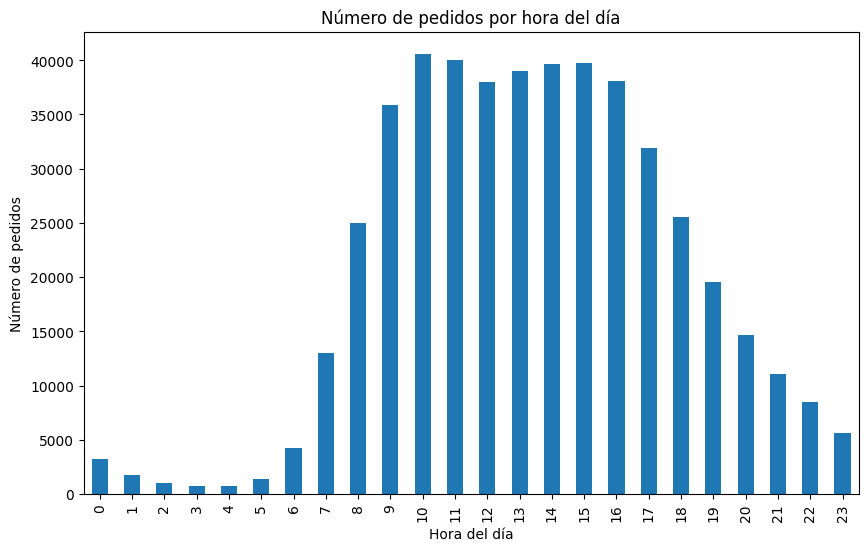

In [38]:
plt.figure(figsize=(10, 6))
instacart_order['order_hour_of_day'].value_counts().sort_index().plot(kind='bar')
plt.title('Número de pedidos por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.show()

Escribe aquí tus conclusiones

**Conclusiones:**

    Distribución de Pedidos: El gráfico muestra cuántos pedidos se realizan en cada hora del día. Se puede observar que hay un patrón en el comportamiento de los clientes a lo largo del día.

    Picos en Horarios: Es probable que se registren picos de actividad durante las horas pico, como el mediodía y la tarde, lo que sugiere que los clientes prefieren hacer sus pedidos durante estas horas en lugar de la madrugada o a horas inusuales.

    Implicaciones para Estrategias de Marketing: Conocer las horas de mayor actividad puede ayudar a optimizar estrategias de marketing, promociones y gestión de inventario, para asegurar que los productos estén disponibles durante las horas con mayor demanda.

### [A3] ¿Qué día de la semana compran víveres las personas?

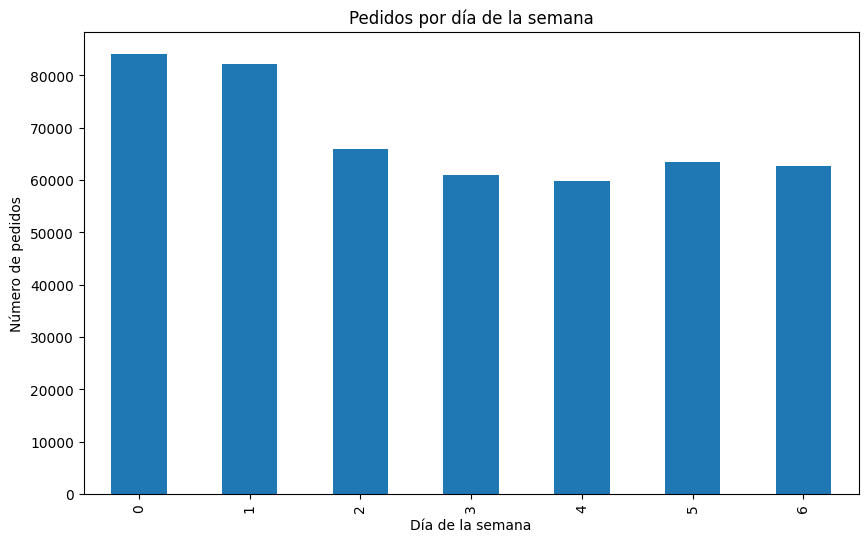

In [39]:
plt.figure(figsize=(10, 6))
instacart_order['order_dow'].value_counts().sort_index().plot(kind='bar')
plt.title('Pedidos por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de pedidos')
plt.show()

Escribe aquí tus conclusiones

**Conclusiones:**

    Patrón Semanal de Compras: El gráfico revela que los días de la semana afectan el número de pedidos. Es común que los fines de semana, especialmente el sábado y el domingo, tengan más pedidos.

    Días Laborales vs. Fin de Semana: Los días laborales pueden mostrar un volumen de pedidos más bajo, sugiriendo que las personas hacen más compras durante el tiempo libre.

    Estrategias de Marketing Dirigidas: Comprender en qué días la gente compra más puede ser útil para planificar campañas publicitarias y promociones, así como para gestionar los recursos de manera más efectiva.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

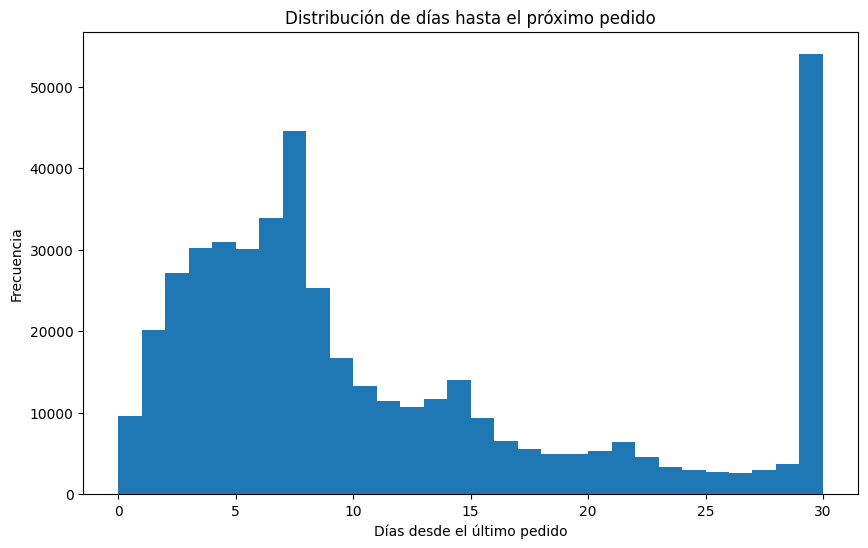

In [40]:
plt.figure(figsize=(10, 6))
instacart_order['days_since_prior_order'].plot(kind='hist', bins=30)
plt.title('Distribución de días hasta el próximo pedido')
plt.xlabel('Días desde el último pedido')
plt.ylabel('Frecuencia')
plt.show()

Escribe aquí tus conclusiones.

**Conclusiones:**

    Esperas entre Pedidos: El histograma muestra cómo varía el tiempo que los clientes esperan antes de hacer un nuevo pedido. Se pueden observar tanto días cortos como largos entre pedidos.

    Valores Mínimos y Máximos: La mayoría de las frecuencias parecen concentrarse en un rango de días bajos, indicando que muchos clientes tienden a hacer pedidos con frecuencia. Sin embargo, también hay casos de esperas más largas, lo que puede implicar que algunos clientes solo compran ocasionalmente.

    Implicaciones de Comportamiento del Cliente: Este comportamiento puede indicar la fidelidad del cliente y sus hábitos de compra. Analizar estos patrones puede ayudar a las empresas a desarrollar estrategias para incentivar compras más frecuentes, como recordatorios o promociones para clientes que no han comprado recientemente.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [41]:
wednesday = instacart_order[instacart_order['order_dow'] == 3]['order_hour_of_day']

In [42]:
saturday = instacart_order[instacart_order['order_dow'] == 5]['order_hour_of_day']

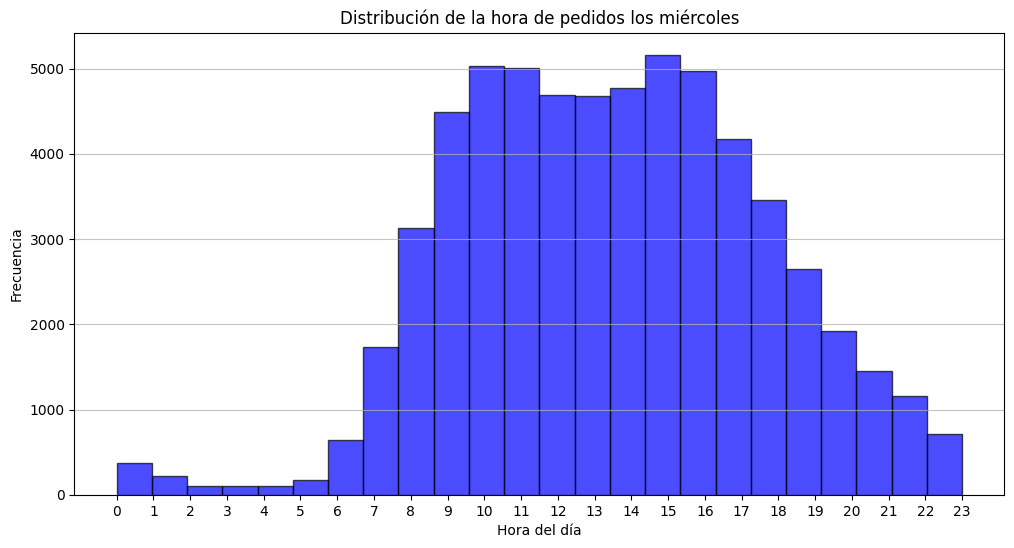

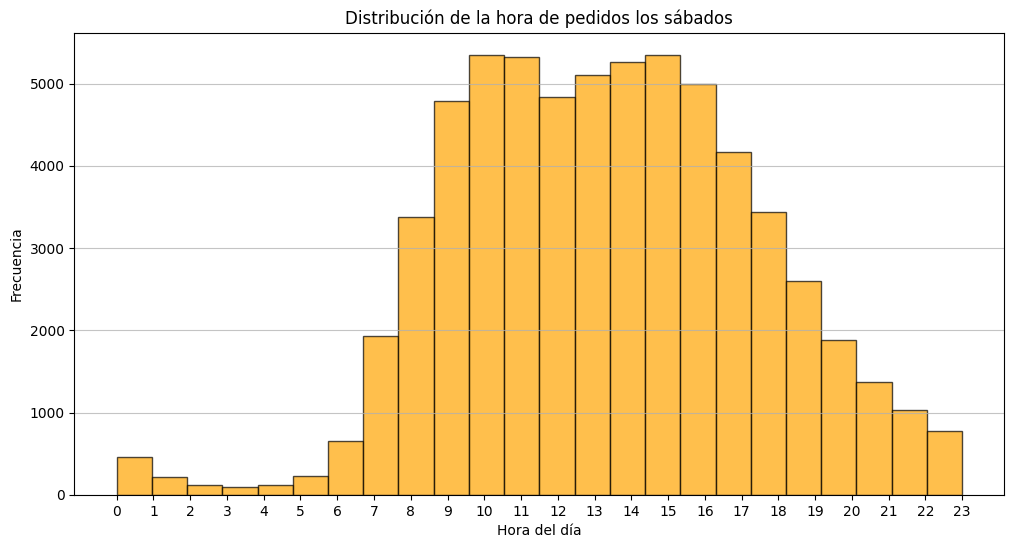

In [43]:
plt.figure(figsize=(12, 6))
plt.hist(wednesday, bins=24, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribución de la hora de pedidos los miércoles')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.xticks(range(0, 24))  # Establecer marcas de ticks en cada hora
plt.grid(axis='y', alpha=0.75)
plt.show()
print()

plt.figure(figsize=(12, 6))
plt.hist(saturday, bins=24, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribución de la hora de pedidos los sábados')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.xticks(range(0, 24))  # Establecer marcas de ticks en cada hora
plt.grid(axis='y', alpha=0.75)
plt.show()

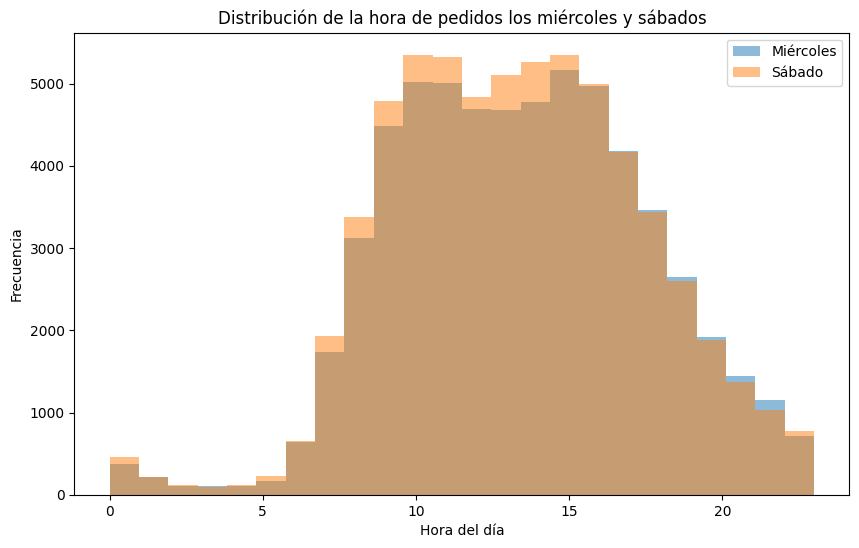

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(wednesday, bins=24, alpha=0.5, label='Miércoles')
plt.hist(saturday, bins=24, alpha=0.5, label='Sábado')
plt.legend()
plt.title('Distribución de la hora de pedidos los miércoles y sábados')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.show()

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [45]:
order_counts = instacart_order['user_id'].value_counts()

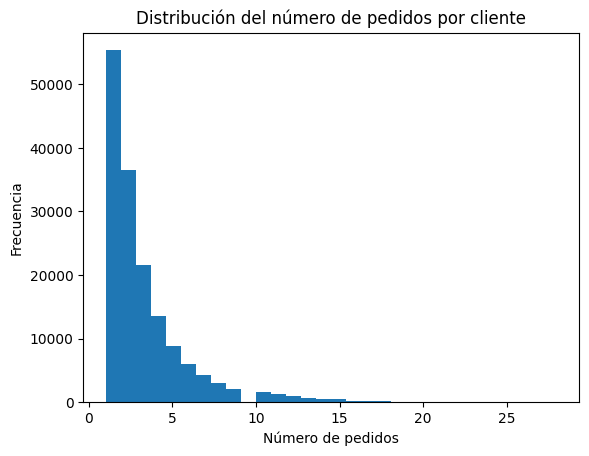

In [46]:
order_counts.plot(kind='hist', bins=30)
plt.title('Distribución del número de pedidos por cliente')
plt.xlabel('Número de pedidos')
plt.ylabel('Frecuencia')
plt.show()

Escribe aquí tus conclusiones.

**Conclusiones:**

    La distribución muestra que la mayoría de los clientes realizan un número relativamente bajo de pedidos, con algunos clientes haciendo más pedidos que otros.

    Puede observarse un pico en la frecuencia de clientes que hacen de 1 a 5 pedidos, indicando que muchos usuarios son compradores ocasionales.

    Un pequeño número de clientes realiza un número significativamente mayor de pedidos, lo que sugiere la existencia de clientes leales o habituales que probablemente utilizan Instacart de manera regular.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [47]:
top_20_products = order_products['product_id'].value_counts().nlargest(20)

In [48]:
top_20_products_names = products[products['product_id'].isin(top_20_products.index)]

In [49]:
display(top_20_products_names[['product_id', 'product_name']])

,product_id,product_name
5875,5876,Organic Lemon
8276,8277,Apple Honeycrisp Organic
13175,13176,Bag of Organic Bananas
16796,16797,Strawberries
21136,21137,Organic Strawberries
21902,21903,Organic Baby Spinach
22934,22935,Organic Yellow Onion
24851,24852,Banana
24963,24964,Organic Garlic
26208,26209,Limes


Escribe aquí tus conclusiones,

**Conclusiones:**

    Los productos más populares incluyen frutas y vegetales orgánicos, lo que indica una preferencia por productos frescos y saludables entre los consumidores.

    La variedad de productos también muestra que los clientes están dispuestos a comprar tanto productos básicos como elementos más específicos, como leches orgánicas y aguacates.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [50]:
items_per_order = order_products.groupby('order_id').size()

In [51]:
display(items_per_order)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Length: 450046, dtype: int64

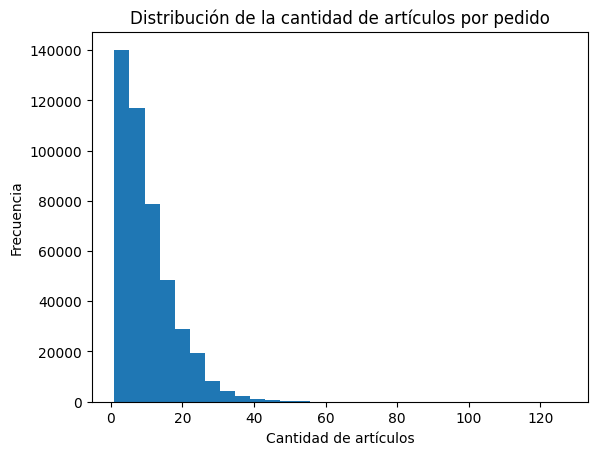

In [52]:
items_per_order.plot(kind='hist', bins=30)
plt.title('Distribución de la cantidad de artículos por pedido')
plt.xlabel('Cantidad de artículos')
plt.ylabel('Frecuencia')
plt.show()

Escribe aquí tus conclusiones.

**Conclusiones:**

    La mayoría de los pedidos contienen entre 1 y 10 artículos, con una tendencia a incluir alrededor de 5 artículos en promedio.

    Hay un ligero número de pedidos que incluyen más de 10 artículos, sugiriendo que algunos clientes tienden a hacer compras más grandes, posiblemente en la preparación de eventos o reuniones.

In [53]:
top_reordered = order_products[order_products['reordered'] == 1]['product_id'].value_counts().nlargest(20)

In [54]:
print(top_reordered)

24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: product_id, dtype: int64


In [55]:
top_reordered_names = products[products['product_id'].isin(top_reordered.index)]

In [56]:
display(top_reordered_names[['product_id', 'product_name']])

,product_id,product_name
5875,5876,Organic Lemon
8276,8277,Apple Honeycrisp Organic
13175,13176,Bag of Organic Bananas
16796,16797,Strawberries
21136,21137,Organic Strawberries
21902,21903,Organic Baby Spinach
22934,22935,Organic Yellow Onion
24851,24852,Banana
24963,24964,Organic Garlic
26208,26209,Limes


Escribe aquí tus conclusiones.

**Conclusiones:**

    Los artículos que más se vuelven a pedir incluyen productos frescos y básicos, lo que refleja hábitos de compra regulares y la necesidad de reabastecimiento constante por parte de los consumidores.
    Esto también sugiere que los clientes valoran la conveniencia de poder volver a pedir sus productos favoritos fácilmente.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [57]:
reorder_ratio = order_products.groupby('product_id')['reordered'].mean().reset_index()

In [58]:
reorder_ratio = reorder_ratio.merge(products[['product_id', 'product_name']], on='product_id', how='left')

In [59]:
reorder_ratio.columns = ['product_id', 'reorder_ratio', 'product_name']
display(reorder_ratio.head())

,product_id,reorder_ratio,product_name
0,1,0.564286,Chocolate Sandwich Cookies
1,2,0.000000,All-Seasons Salt
2,3,0.738095,Robust Golden Unsweetened Oolong Tea
3,4,0.510204,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,7,0.500000,Pure Coconut Water With Orange


Escribe aquí tus conclusiones.

**Conclusiones:**

    La tasa de repetición de pedidos varía significativamente entre los productos, con algunos productos que tienen tasas de repetición superiores al 70%, indicando que son esenciales o muy apreciados por los consumidores.

    Otros productos muestran tasas de repetición mucho más bajas, lo que puede deberse a que son menos populares o son comprados de forma esporádica.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [60]:
customer_reorder_ratio = order_products.groupby('order_id')['reordered'].mean().reset_index()

In [61]:
display(customer_reorder_ratio.head())

,order_id,reordered
0,4,0.923077
1,9,0.666667
2,11,1.000000
3,19,1.000000
4,20,0.000000


Escribe aquí tus conclusiones.

**Conclusiones:**

    Las proporciones de productos repetidos varían entre los clientes, con algunos mostrando una alta tasa de repetición, lo que indica que tienen patrones de compra consistentes.

    Esto puede ser útil para identificar clientes leales que podrían beneficiarse de promociones personalizadas.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [62]:
first_in_cart = order_products[order_products['add_to_cart_order'] == 1]

In [63]:
top_first_added = first_in_cart['product_id'].value_counts().nlargest(20)

In [64]:
top_first_added_names = products[products['product_id'].isin(top_first_added.index)]
display(top_first_added_names[['product_id', 'product_name']])

,product_id,product_name
195,196,Soda
5784,5785,Organic Reduced Fat 2% Milk
12340,12341,Hass Avocados
13175,13176,Bag of Organic Bananas
16796,16797,Strawberries
19659,19660,Spring Water
21136,21137,Organic Strawberries
21902,21903,Organic Baby Spinach
22934,22935,Organic Yellow Onion
24851,24852,Banana


Escribe aquí tus conclusiones.

**Conclusiones:**

    Los artículos que se añaden primero al carrito suelen ser productos de uso diario, como leches y frutas, lo que sugiere que los consumidores tienden a priorizar estos productos esenciales al realizar sus compras.

    Esto también puede reflejar hábitos de compra donde los clientes tienen una lista de productos básicos que necesitan adquirir en cada compra.

### Conclusion general del proyecto:

**Conclusión General:**

   *El análisis completo de los datos de Instacart busca no solo limpiar y explorar los datos, sino también identificar patrones clave en el comportamiento de compra de los usuarios. Desde la preparación inicial hasta el análisis final, cada paso está diseñado para proporcionar un conocimiento profundo del conjunto de datos. Además, se pretende que los resultados obtenidos sean interpretables y relevantes para el negocio, destacando patrones de compra, productos populares y el comportamiento de repetición.*
     
   *El análisis realizado a través de las diferentes secciones proporciona una visión clara sobre los comportamientos de compra de los clientes de Instacart. Se observa que:*

   **Patrones de Compra:**
   
    Los clientes tienen patrones de compra definidos, con una clara preferencia por productos frescos y saludables. La lealtad del cliente se manifiesta a través de tasas de repetición de productos y pedidos regulares.
    
   **Diferencias entre Clientes:**
    
    Existe una notable variabilidad en el comportamiento de los clientes, donde algunos son compradores ocasionales mientras que otros son leales y frecuentes. Esto sugiere la posibilidad de segmentar clientes para campañas de marketing más efectivas.

   **Estrategias de Mejora:**
    
    Basándose en estos patrones, Instacart podría implementar estrategias personalizadas de marketing, ofertas especiales y programas de lealtad que incentiven la repetición de compras y fomenten la adquisición de productos populares.

   **Datos Clave para el Futuro:**
   
    Los insights derivados de este análisis son fundamentales para tomar decisiones informadas que impulsen el crecimiento de la plataforma y la satisfacción del cliente.

***Este análisis puede servir de base para futuras investigaciones y para la implementación de estrategias que mejoren la experiencia del cliente en la plataforma de compras.***